# Assignment 1 - Supervised Learning - Classification

The purpose of this assignment is to use machine learning algorithms to classify data points which have a **label**. We will classify the dataset below, which consists in 4 clusters. For this assignment, your objective is to try out 2-3 classification methods, justifying why you picked up these methods and fine-tuning a bit their parameters.

The dataset is produced with the first two block of code (below): the first one imports the necessary modules and the second generates the dataset `X, y`.


In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline 

200
1.516176180359357
0.9999999999999993
1.121325254871408e-16


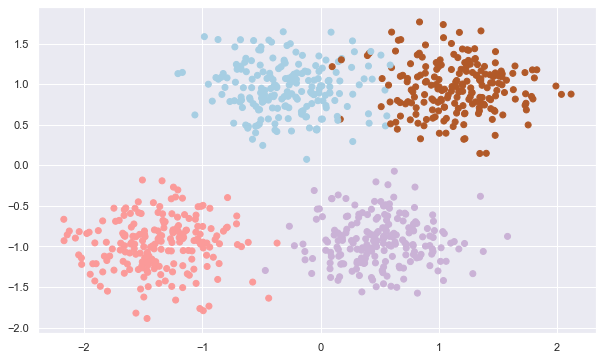

In [40]:
centers = [[0.5, 2], [-1, -1], [1.5, -1], [2.5, 2]] 
#Create dataset
X, y = make_blobs(n_samples=800, centers=centers, 
                  cluster_std=0.5, random_state=0) 
# print(len(X[:,1][np.where(y==0)]))
# print(np.std(X))
#Normalize the values
X = StandardScaler().fit_transform(X)
# print(np.std(X[:,1]))
# print(np.mean(X[:,1]))
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y,  cmap='Paired')
# , cmap='Paired'

## Testing your classifier

The function below can be used to test the classifier: it shows the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and returns the fraction of points that have been correctly classified.

In [32]:
def analyse_classifier(model, X, y):
  yPred = model.predict(X)
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y, yPred)
  import matplotlib.pyplot as plt
  %matplotlib inline
  import seaborn as sns; sns.set()
  sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  nTotal = len(y)
  nCorrect = np.count_nonzero(y-yPred==0)
  print(f"Correcly classified {nCorrect} out of {nTotal} points ({nCorrect/nTotal*100}%)")

As an example to get started, have a look at the code below, and answer the following questions.

*Suggestions:*
- *to put your answer, edit the text and put it between the two groups of `**` which make the text in bold (please preserve `Answer:` part).*
- *if you need to use code (you'll often need to), just create new Text and Code blocks as needed, even multiple, below. Do not forget to properly comment things in the text part as well as in the code using `# This is a comment`*

Questions:
1. What is the classified being trained? What does it do? What do the options mean? 
2. How well does the classifier perform? Can we do better? How?
3. Can you describe the algorithm another way? Making use of two pieces ?


1
Correcly classified 790 out of 800 points (98.75%)


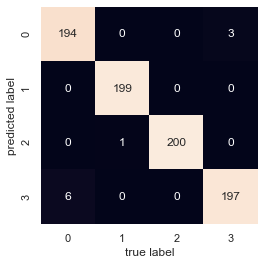

In [33]:
from sklearn.ensemble import RandomForestClassifier
# Instantiating a random forest classifier
model_1 = RandomForestClassifier(n_estimators=1, random_state=0)
# Fitting the model to our datapoints
model_1.fit(X, y)
# Evaluate the classifier
analyse_classifier(model_1, X, y)

1. What is the classified being trained? What does it do? What do the options mean?

**Answer: the number of trees used in the forest**

2. How well does the classifier perform? Can we do better? How?

**Answer: it performs pretty good with an accuracy of 98.75% on trained data however only one tree was used in the forest so we can increase the number of trees throught the n_estimators**

First attempt at improvement of the classifier used above.

1
Correcly classified 789 out of 800 points (98.625%)


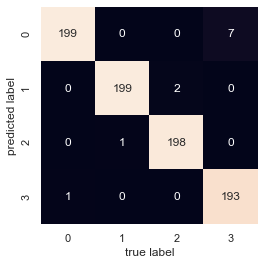

In [35]:
# Enter your code here and call analyse_classifier (by un-commenting the lines below and filling them in as appropriate)
model_2 = RandomForestClassifier(n_estimators=2, random_state=0)
model_2.fit(X, y)
analyse_classifier(model_2, X, y)

Another attempt 



1
Correcly classified 794 out of 800 points (99.25%)


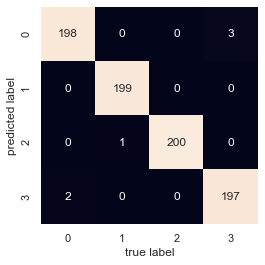

In [36]:
# Enter your code here and call analyse_classifier (by un-commenting the line below)
model_2 = RandomForestClassifier(n_estimators=3, random_state=0)
model_2.fit(X, y)
analyse_classifier(model_2, X, y)

3. Can you describe the algorithm another way? Making explicit of the two pieces (algorithms) used ?

**Answer: the algoristhm uses many decision trees of classification and buildes a more stable decision nodes increasing more the accuracy and stability of the model **

1
Correcly classified 794 out of 800 points (99.25%)


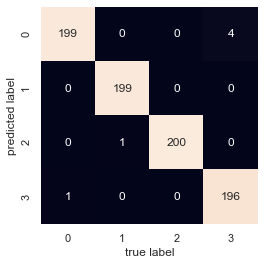

In [37]:
# Enter your code here
model_2 = RandomForestClassifier(n_estimators=4, random_state=0)
model_2.fit(X, y)
analyse_classifier(model_2, X, y)

## Properly using the dataset for machine learning

1. What can you tell me about the way we've been using the dataset so far ? Is it appropriate ?

**Answer: we've been using the dataset for training and evaluating performance, in doing so, we're running the risk of unnoticed overfitting **

2. What can you tell me about the multiple ways one can split the dataset to train machine learning algorithms ?

**Answer: there are generally 3 ways,the hold out method where the model learns on around 50% to 70% of the data and tests on 50% to 30% of the data, the 2nd algorithm is K-fold crossvalidation where we split the data into partitions learn on few partitions and test on others and then include that partition and remove another one from the training dataset to predict on it, and the 3rd algorithm is bootstrapping aggregating (or bagging) taking around 60% of data for training and the rest for testing and then generating samples out of training data, fitting the model to the gennerated sample and then testing each on the test dataset and choosing the model that performs best on minimizing prediction error and maximizing accuracy consistency **

3. When a small amount of data is available, are there alternative methods that can be used, rather than splitting the dataset? Please explain.

**Answer: yes, kfold crossvalidation technique is used especially in this case, where we split the data into partitions learn on few partitions and test on others and then include that partition and remove another one from the training dataset to predict on it **


In the cases below, the example code doesn't take into account any splitting. ***Please split the data accordingly (using examples from tutorials or from the internet), and don't forget to adjust the code examples accordingly, so as to fit and evaluate the model on different datasets.***

In [58]:
# Code to split the dataset appropriately
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

# print(len(X_train[np.where(y_train==0)])/len(X[np.where(y==0)]))


## Trying out other algorithms

Please try out different algorithms and see whether they perform better or worse, and try to explain why that might be, and whether there's something that can be done to improve the situation.

### Alternative Algorithm #1

Please briefly decsribe the algorithm briefly, and explain what it attempts to do. If needed, you can create multiple other models with different settings and compare them to explain your thought process.

**Answer:  KNN or K nearest neighbors is one of non linear classifiers, and it classifies the point based on its location in the space of original data and the weighted class of the majority points in its vicinity **




for weights :  uniform  and n_neighbors of :  1
1
Correcly classified 194 out of 200 points (97.0%)



for weights :  uniform  and n_neighbors of :  2
1
Correcly classified 197 out of 200 points (98.5%)



for weights :  uniform  and n_neighbors of :  3
1
Correcly classified 196 out of 200 points (98.0%)



for weights :  uniform  and n_neighbors of :  4
1
Correcly classified 199 out of 200 points (99.5%)



for weights :  uniform  and n_neighbors of :  5
1
Correcly classified 199 out of 200 points (99.5%)



for weights :  uniform  and n_neighbors of :  6
1
Correcly classified 200 out of 200 points (100.0%)



for weights :  uniform  and n_neighbors of :  7
1
Correcly classified 200 out of 200 points (100.0%)



for weights :  uniform  and n_neighbors of :  8
1
Correcly classified 200 out of 200 points (100.0%)



for weights :  uniform  and n_neighbors of :  9
1
Correcly classified 199 out of 200 points (99.5%)



for weights :  distance  and n_neighbors of :  1
1
Correcly classif

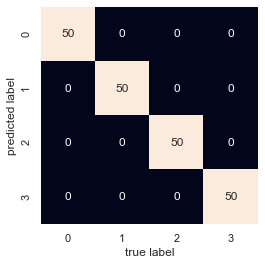

In [63]:
# Enter your code here and call analyse_classifier (by un-commenting the line below)
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import neighbors
for weights in ['uniform', 'distance']:
    for n_neighbors in range(10)[1:]:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)
        print("\n\n\nfor weights : ",weights," and n_neighbors of : ", n_neighbors )
        analyse_classifier(clf, X_test, y_test)
# Don't forget to fit your model before calling analyse_classifier
#apparently the weighted distance fitting is consistent and accurate and the n_neighbors doesn't seem to matter much
print("\n\n\n\n the model_5 performance is as follow: ")
model_5 = KNeighborsClassifier(6, weights='uniform')
model_5.fit(X_train, y_train)
analyse_classifier(model_5, X_test, y_test)

### Alternative Algorithm #2

Please briefly decsribe the algorithm briefly, and explain what it attempts to do. If needed, you can create multiple other models with different settings and compare them to explain your thought process.

**Answer: Logistic regression classifier uses maximum likelihood to classify the data, it is one of the generalized linear regression methods**

1
Correcly classified 200 out of 200 points (100.0%)


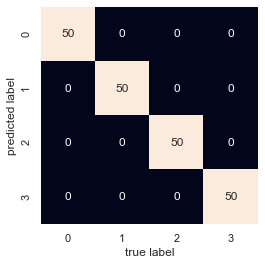

In [61]:
# Enter your code here and call analyse_classifier (by un-commenting the line below)
from sklearn.linear_model import LogisticRegression
model_6 =  LogisticRegression(random_state=0)

model_6.fit(X_train, y_train)

model_6.score(X_test, y_test)
# Don't forget to fit your model before calling analyse_classifier
# model_6 = FILL IN
analyse_classifier(model_6, X_test, y_test)

### Alternative Algorithm #3

Please briefly decsribe the algorithm briefly, and explain what it attempts to do. If needed, you can create multiple other models with different settings and compare them to explain your thought process.

**Answer: SVM (Support vector machines) here is used with a liear kernel, is simply finding a hyperplane separating the clusters from each other by trying to maximize the margin around the hyperplane**

1
Correcly classified 200 out of 200 points (100.0%)


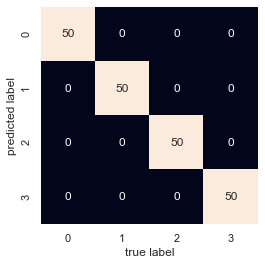

In [69]:
# Enter your code here and call analyse_classifier (by un-commenting the line below)
from sklearn import svm
# Don't forget to fit your model before calling analyse_classifier
model_7 = svm.SVC(kernel='linear')
# one vs one | one vs rest
# model_7 = svm.SVC(kernel='linear',decision_function_shape='ovo')
# model_7 = svm.SVC(kernel='rbf',C=1,gamma=2**-5)
model_7.fit(X_train,y_train)
analyse_classifier(model_7, X_test, y_test)

## Handling small datasets

Above, we discussed how to handle small datasets. Assuming `X` is a small dataset, please show me how to use a method that can use it in full, yet remain safe in terms of implementation.

In [148]:
# Handling of small datasets
from sklearn.model_selection import KFold
kf=KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## Assuming the dataset is not labeled

Let's assume that you were given ONLY `X`, i.e. you don't know the *label* of these data points.

1. Can you use the same machine learning methods? What do you need to change?

**Answer: the problem changes, no labels means no Y to predict, then the problem becomes an unsupervised learning problem**

2. Can you pick a model that you could use if only given `X` ? Please implement one version (in the block below).*italicized text*

**Answer: yes, one of the unsupervised learning algorithm that we can use is Kmeans, since all vectors are numerical**

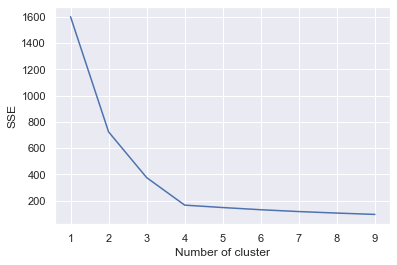

In [142]:
# Code block to implement model that would group points without knowing their label
from sklearn.cluster import KMeans
import pandas as pd
# S= pd.concat([pd.DataFrame(model_8.transform(X_test)),pd.DataFrame(model_8.predict(X_test),columns=['labels'])],axis=1)
sse=dict()
for k in range(1,10):
    clf=KMeans(n_clusters=k, random_state=0)
    clf.fit(X)
    sse[k]=clf.inertia_

plt.figure()
plt.plot(range(1,10), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# the elbow is at 4 clusters
model_8 = KMeans(n_clusters=4, random_state=0)
model_8.fit(X) ## Don't use y here
# model_8.inertia_
# plt.plot(list(range(len(S[y_test==0][:,0]))),S[model_8.predict(X_test)==0][:,])
# print(list(range(len(S[y_test==0][:,0]))))

Let's check how your algorithm performs (running the code below). Are you happy with the result?

**Answer: the kmeans algorithm is taking random number of point in the space (numbers of clusters wanted) and then affecting points to the nearest one of these centers then calculating the barycenter of the clusters and then reiterating till stability. usually this process is launched several times and run parallely   **

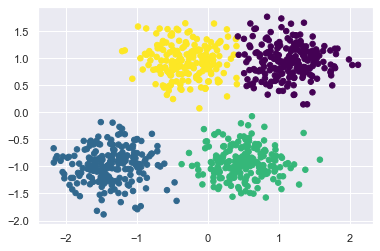

In [78]:
def show_model_prediction(model, X):
  labels = model.fit_predict(X)
  plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=30, cmap='viridis');

# Uncomment to plot
show_model_prediction(model_8, X)